In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, silhouette_score
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('train.csv')
df0 = pd.read_csv('test.csv')
d = pd.read_csv('sample_submission.csv')
df1

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...,...
90610,90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


In [3]:
d

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,10
...,...,...
60406,151021,10
60407,151022,10
60408,151023,10
60409,151024,10


In [4]:
df1['Sex'] = df1['Sex'].replace({'M': 0, 'F': 1, 'I': 2})
df0['Sex'] = df0['Sex'].replace({'M': 0, 'F': 1, 'I': 2})
df = df1.drop(['id'], axis=1)
x = df0.drop(['id'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  int64  
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 6.2 MB


In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             60411 non-null  int64  
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3   Height          60411 non-null  float64
 4   Whole weight    60411 non-null  float64
 5   Whole weight.1  60411 non-null  float64
 6   Whole weight.2  60411 non-null  float64
 7   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.7 MB


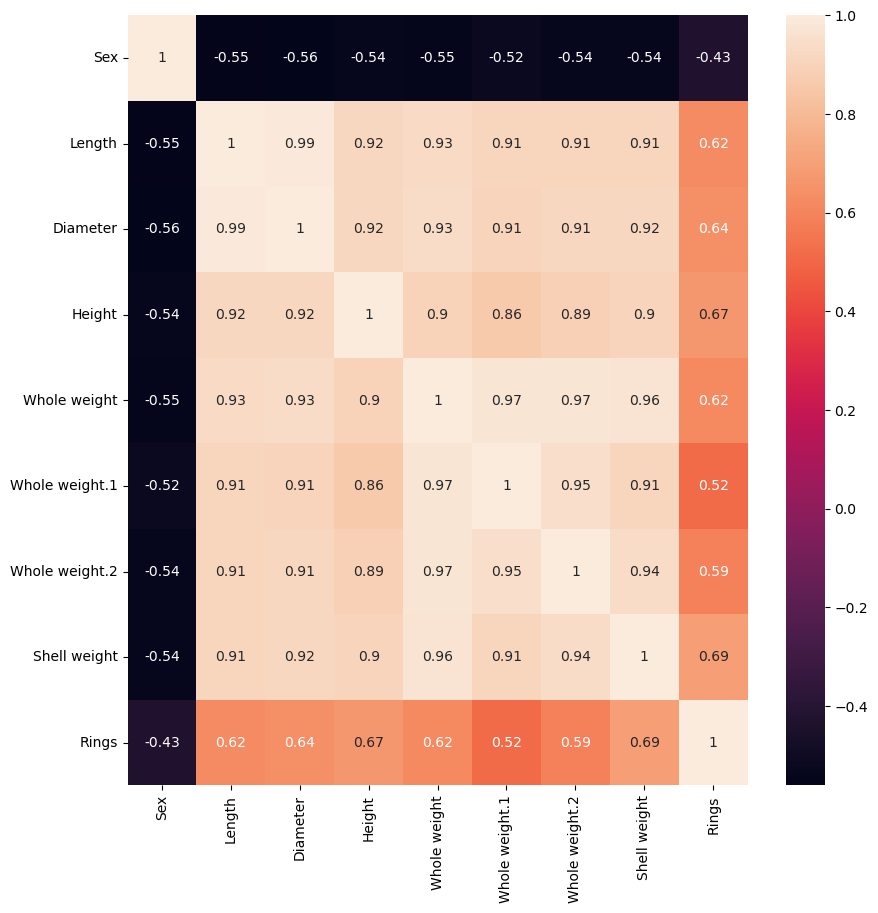

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

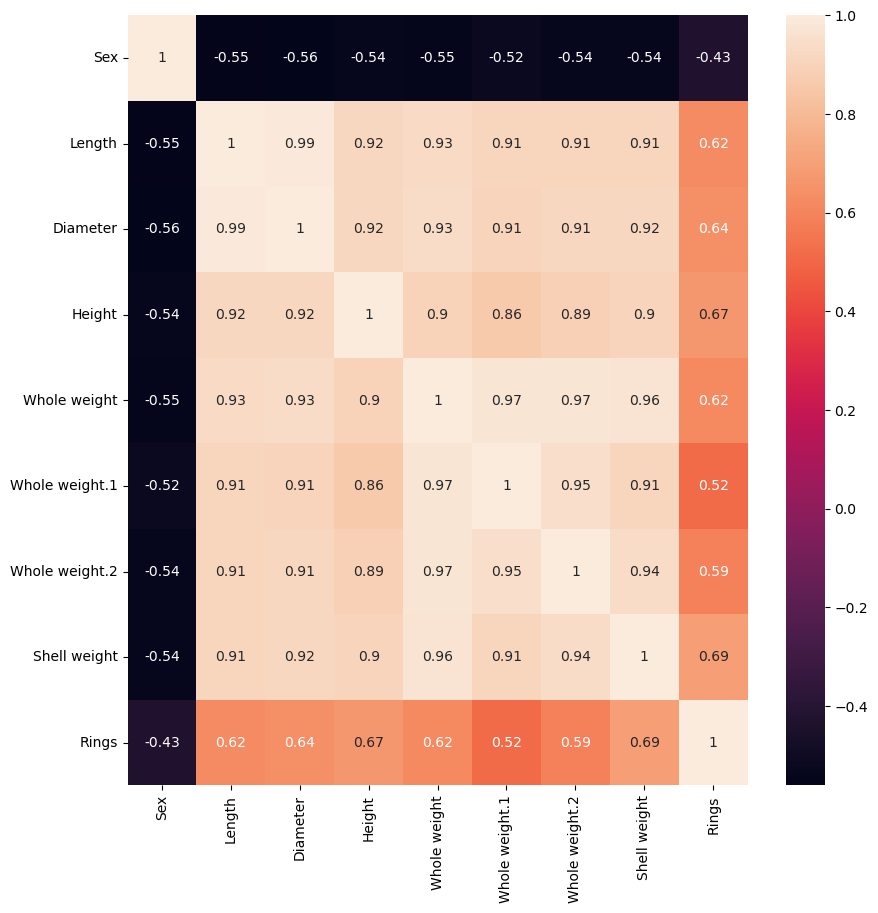

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [9]:
X = df.drop(['Rings'], axis=1)
y = df.Rings

In [10]:
# sklearn.linear_model
lr = LinearRegression()
lg = LogisticRegression()

# sklearn.svm
sl = SVC(kernel='linear')      
sp = SVC(kernel='poly', degree=3) 
sr = SVC(kernel='rbf') 
ss = SVC(kernel='sigmoid') 

# sklearn.naive_bayes
nb = GaussianNB()

# sklearn.neighbors
knn = KNeighborsClassifier(n_neighbors=29)

# sklearn.tree
dt = DecisionTreeClassifier(max_depth=3)

# from sklearn.ensemble
rf = RandomForestClassifier(max_depth=3,n_estimators=100)
bg = BaggingClassifier()
bs = GradientBoostingClassifier()

In [11]:
M = sl

In [12]:
M.fit(X, y)
p = M.predict(X)
pred = pd.DataFrame({'Rings':p})
a = accuracy_score(y, p)*100
a = round ( a, 2)
# b = classification_report(y, p)
# c = confusion_matrix(y, p)

In [13]:
a

35.12

In [14]:
k = M.predict(x)
n = pd.DataFrame({'Rings':k})
Id = list(range(90615,151026))
n['id'] = Id 
n = n[['id', 'Rings']]
n

,id,Rings
0,90615,9
1,90616,9
2,90617,9
3,90618,9
4,90619,7
...,...,...
60406,151021,6
60407,151022,9
60408,151023,10
60409,151024,11


In [15]:
pred1 = pd.DataFrame({'Survived':yp})
pred1

NameError: name 'yp' is not defined